In [1]:
%pylab inline
from sklearn import \
    datasets, \
    linear_model, \
    cross_validation, \
    preprocessing, \
    svm

import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
train = df_train.as_matrix()
test = df_test.as_matrix() # no labels

X_train = train[:,1:]
Y_train = train[:, 0]

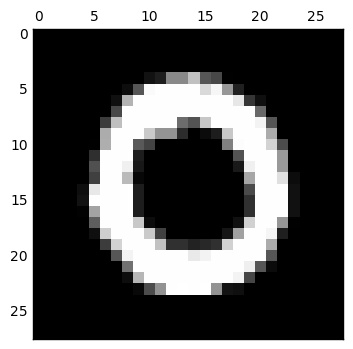

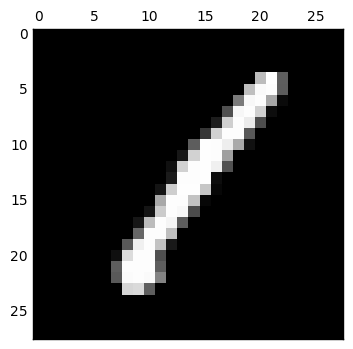

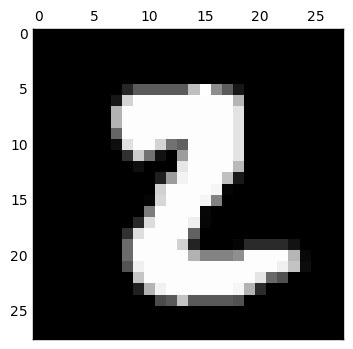

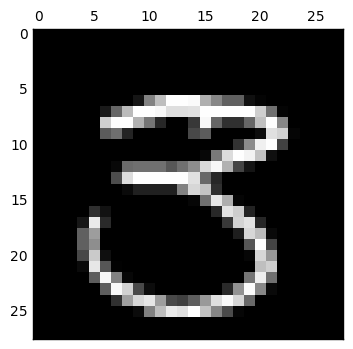

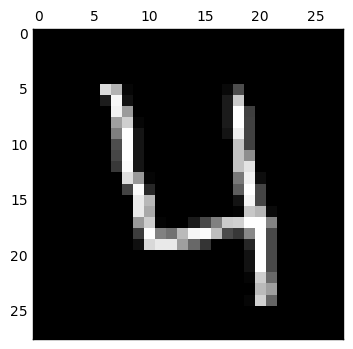

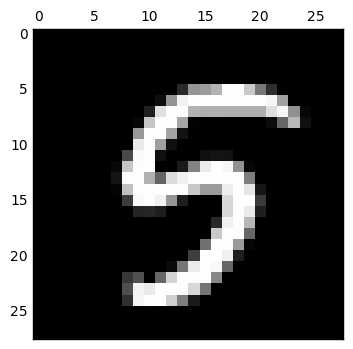

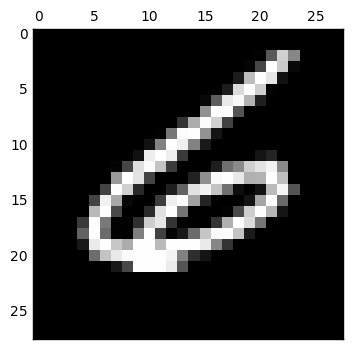

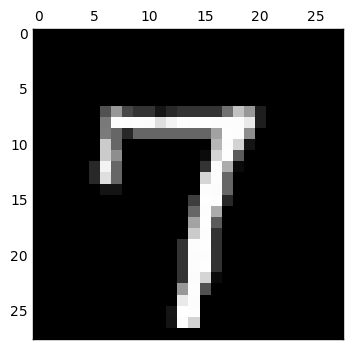

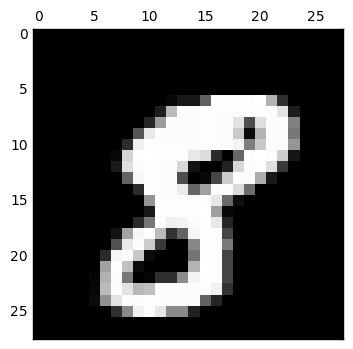

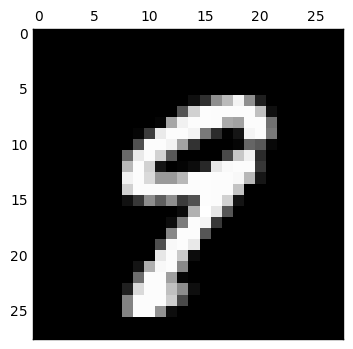

In [3]:
samples = np.empty([10,784])
for i in range(0,10):
    for j in range(0,len(Y_train)):
        if Y_train[j] == i:
            matshow(X_train[j].reshape(28,28), cmap='gray') 
            samples[i] = X_train[j]
            break

(array([ 0.10931217,  0.12391534,  0.11050265,  0.11510582,  0.10772487,
         0.10039683,  0.10944444,  0.11642857,  0.10748677,  0.11079365]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

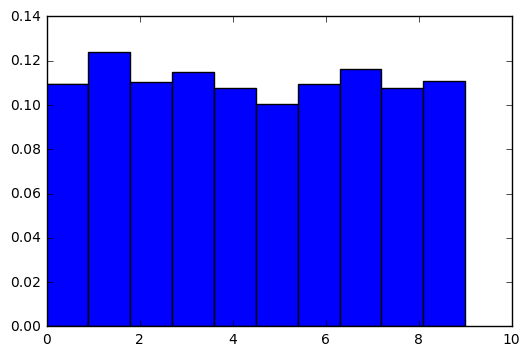

In [4]:
hist(Y_train, normed=True)

In [5]:
#"Sample Digits" are in sample_digits

# find distance with all digits 
dist_min = np.empty([2,10]) # nearest neighbour distance[0,:] and its index[1,:]

pairwise_distances = euclidean_distances(samples, X_train)
print pairwise_distances.shape

(10, 42000)


In [6]:
minval = numpy.ma.masked_equal(pairwise_distances, 0.0, copy=False)
dist_min[0,:] = minval.min(1) 

for i in range(0,10):
    dist_min[1,i] = nonzero(dist_min[0,i] == pairwise_distances)[1][0]
    
print dist_min

[[  1046.59543282    489.67948701   1380.8772574    1832.66499939
    1356.88098225   1066.36766643   1446.51132038    863.50101332
    1593.777588      910.57674031]
 [ 12950.          29704.           9536.           8981.          14787.
   30073.          16240.          15275.          32586.          35742.        ]]


Closest matches to the first ones follow it for comparison
Erroneous sample maybe at 8981 5*


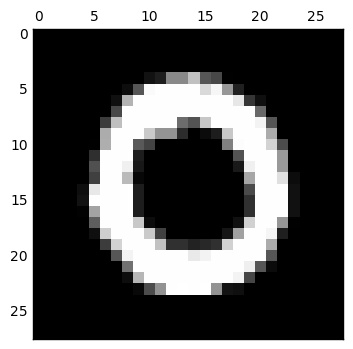

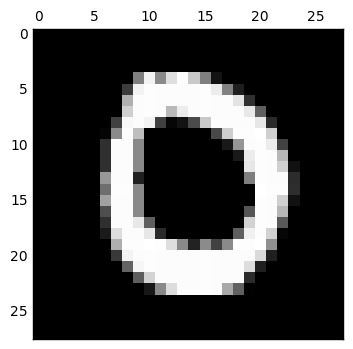

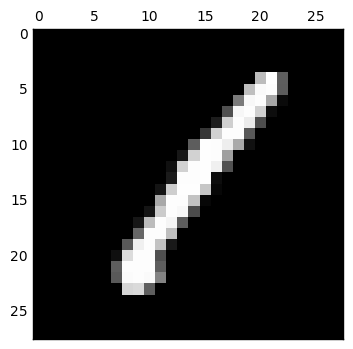

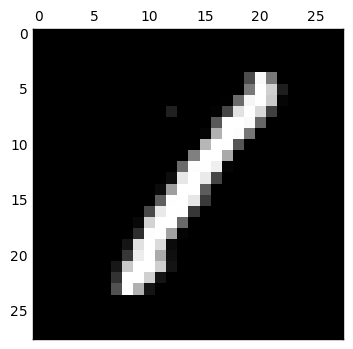

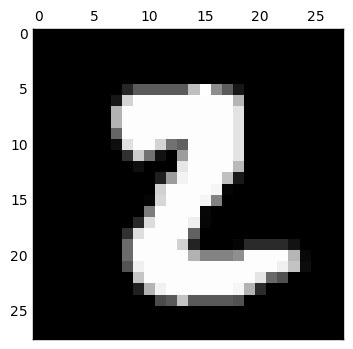

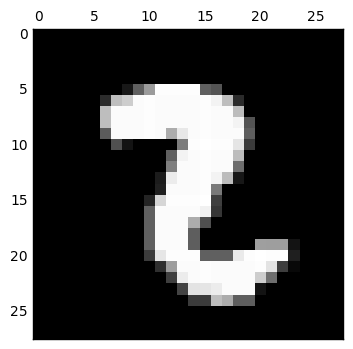

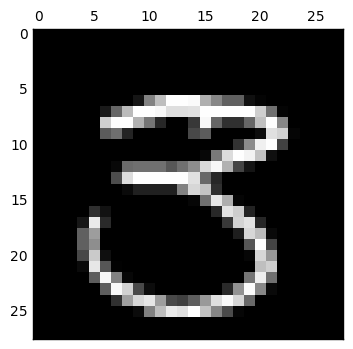

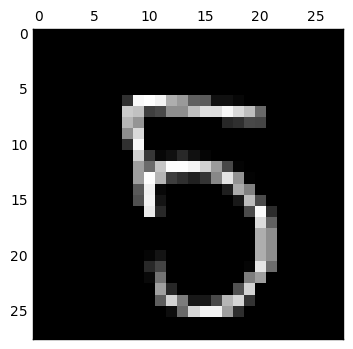

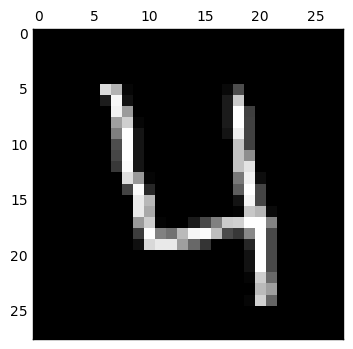

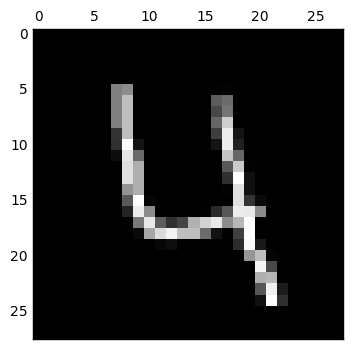

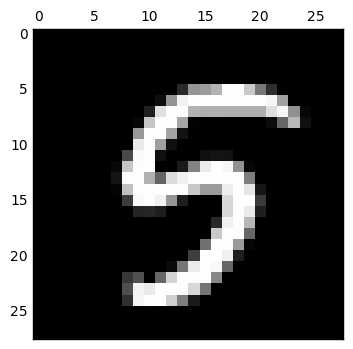

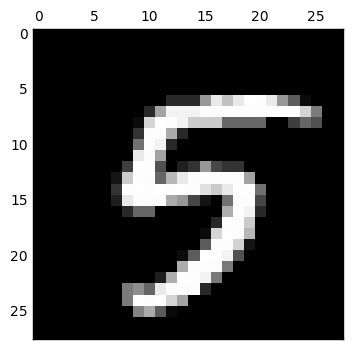

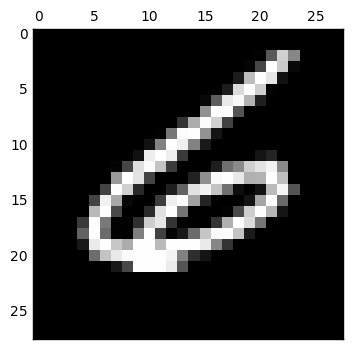

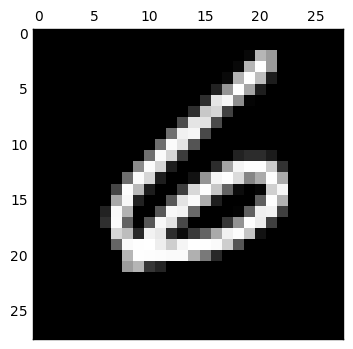

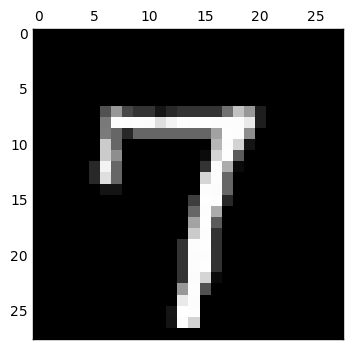

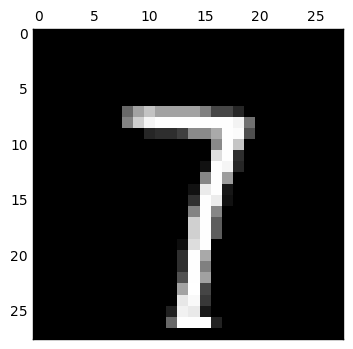

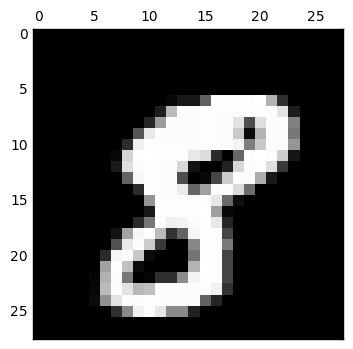

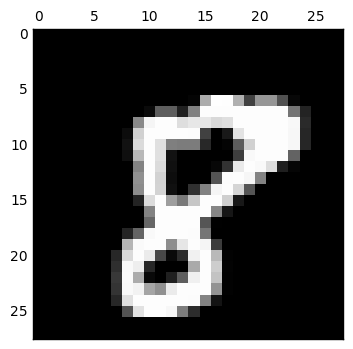

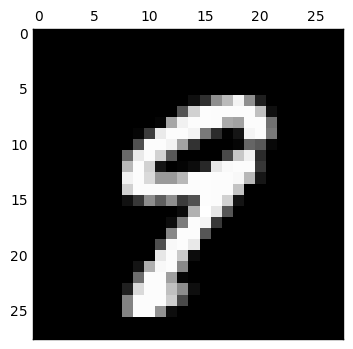

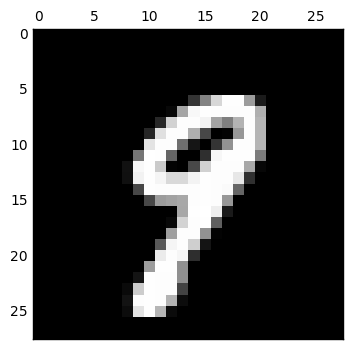

In [7]:
Y_withAsterix = X_train[:, 0]

print "Closest matches to the first ones follow it for comparison"

for i in range(0,10):
    matshow(samples[i].reshape(28,28), cmap='gray')
    matshow(X_train[int(dist_min[1,i])].reshape(28,28), cmap='gray') 
    # check labels of the closest neighbours
    if Y_train[dist_min[1,i]] != i:
        # erroneous samples
        print "Erroneous sample maybe at", int(dist_min[1,i]), str(Y_train[dist_min[1,i]]) + '*'
        #Y_withAsterix[dist_min[1,i]] = str(Y_train[dist_min[1,i]]) + '*'
        #print Y_withAsterix[dist_min[1,i]]

In [8]:
# why should the samples be marked with a * even though the labels are correct ?
# genuine and imposter matches for 0 and 1

In [9]:
zero_index = np.where(train[:,0] == 0)[0]
one_index = np.where(train[:,0] == 1)[0]

zero_samples = X_train[zero_index]
one_samples = X_train[one_index]

In [10]:
# genuine matches
zero_and_zero = numpy.triu(euclidean_distances(zero_samples, zero_samples)).flatten()
one_and_one = numpy.triu(euclidean_distances(one_samples, one_samples)).flatten()

# imposter matches
zero_and_one = euclidean_distances(zero_samples, one_samples).flatten() # 1200 to 4200

In [11]:
zeros_array = numpy.trim_zeros(numpy.sort(zero_and_zero))
ones_array = numpy.trim_zeros(numpy.sort(one_and_one))

genuine = numpy.concatenate((zeros_array,ones_array))
imposter = numpy.trim_zeros(numpy.sort(zero_and_one))

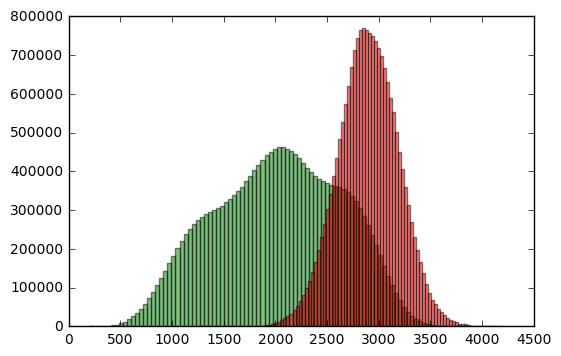

In [12]:
n, b, p = plt.hist(genuine, 100, normed=0, facecolor='g', alpha=0.5)
m, c, q = plt.hist(imposter,100, normed=0, facecolor='r', alpha=0.5)
plt.show()

In [13]:
# kNN classifier

# x0 = query point
# k = find k nearest neighbours of x0
# X = dataset

# to get majority vote from k nearest neighbours 
# output = majority_vote

def kNN(X, y, x0, k):
    
    k_neighbour_votes = []
    
    distance_to_x0 =  numpy.ma.masked_equal(euclidean_distances(x0, X), 0.0, copy=False)
    
    # sort to get kNN
    distances_to_kNN = numpy.sort(distance_to_x0)[0][:k]
    
    # get indices of kNN from y
    for i in range(0,k):
        k_neighbour_votes.append(y[nonzero(distances_to_kNN[i] == distance_to_x0)[1][0]])
       
    counts = np.bincount(k_neighbour_votes)    
    prediction_for_x0 = np.argmax(counts)
    
    return prediction_for_x0

In [22]:
kNN(X_train, Y_train, test[5000],20)

1

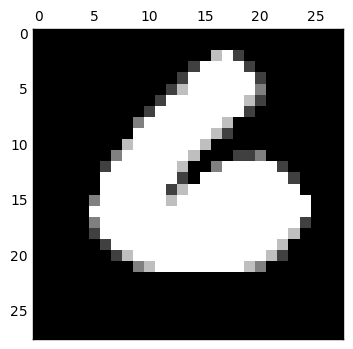

In [15]:
matshow(X_train[500].reshape(28,28), cmap='gray')

In [17]:
predictions = np.empty([len(test), 1])
print len(test)

28000


In [25]:
for i in range(0, len(test)):
    if i%100 == 0:
        print i
    predictions[i] = kNN(X_train, Y_train, test[i], 3)

0
100
200
300
400
500


KeyboardInterrupt: 

In [19]:
skf = cross_validation.StratifiedKFold(Y_train, n_folds=3, shuffle=True, random_state=None)

In [20]:
confusion_matrix = numpy.empty([10,10])
for train_index, test_index in skf:
    score = 0
    X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
    y_train_cv, y_test_cv = Y_train[train_index], Y_train[test_index]
        
    for i in range(0, len(X_test_cv)):
        actual_y = y_test_cv[i]
        prediction_y = kNN(X_train_cv, y_train_cv, X_test_cv[i], 100)
        if actual_y == prediction_y:
            score = score + 1
            confusion_matrix[actual_y][prediction_y] = confusion_matrix[actual_y][prediction_y] + 1
            
    print score, len(y_test_cv)
    
print confusion_matrix
matshow(confusion_matrix)

print "Accuracy ", score, len(Y_train)

KeyboardInterrupt: 

In [ ]:
predictions = np.empty([len(test), 1])

for i in range(0, len(test)):
    print i
    predictions[i] = kNN(X_train, Y_train, test, 100)
    
numpy.savetxt('predictions.csv', predictions)